# Clothoid Exploration

Due to a personal project I got somewhat involved with clothoids (also known as Euler spiral or Cornu spiral). I mainly wanted to analytically determine the **distance to a point** and **get a bounding box**. The main feature of a clothoid is that is has a **linearly increasing curvature** which makes it a ideal transition between two curvatures. Basis of the clothoid are the Fresnel integrals.

\begin{equation*}
S(s) = \int_0^s sin(\frac{1}{2} \pi t^2) dt
\end{equation*}

\begin{equation*}
C(s) = \int_0^s cos(\frac{1}{2} \pi t^2) dt
\end{equation*}

In [7]:
import matplotlib.pyplot as plt
import scipy.special as sc
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

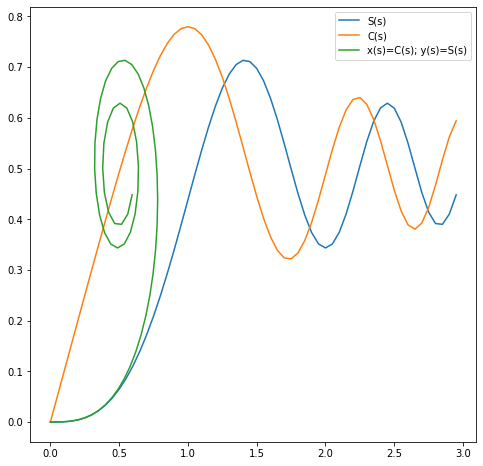

In [8]:
s_vals = np.arange(0.0, 3.0, 0.05)
S, C = sc.fresnel(s_vals)
plt.plot(s_vals, S, label="S(s)")
plt.plot(s_vals, C, label="C(s)")
plt.plot(C, S, label="x(s)=C(s); y(s)=S(s)")
plt.legend(loc="upper right")

As you can see if we use $x(s)=C(s)$ and $y(s)=C(s)$ we get the typical shape of a clothoid. There is also a constant which controls the incline in curvature (*a*). For the library I used the formula was:

\begin{equation*}
\begin{pmatrix}
x \\\
y 
\end{pmatrix}
(s) = a*\int_0^{\frac{s}{a}}
\begin{pmatrix}
cos(\frac{1}{2} \pi t^2) \\\
sin(\frac{1}{2} \pi t^2) 
\end{pmatrix} dt
\end{equation*}

\begin{equation*}
a = \sqrt{\frac{\pi}{\lvert \dot c \rvert}}
\end{equation*}

Where $\dot c$ is the derivate of curvature $c$. The curvature is in $\frac{1}{m}$ and dictates the radius a circle would have a certain point along the clothoid. Using different $\dot c$ values gives us an impresssion how this parameter affects the shape. Also we can get the tangent angle of any point on the clothoid via:

\begin{equation*}
\alpha_{tangent} = \frac{1}{2} s^2 \dot c
\end{equation*}

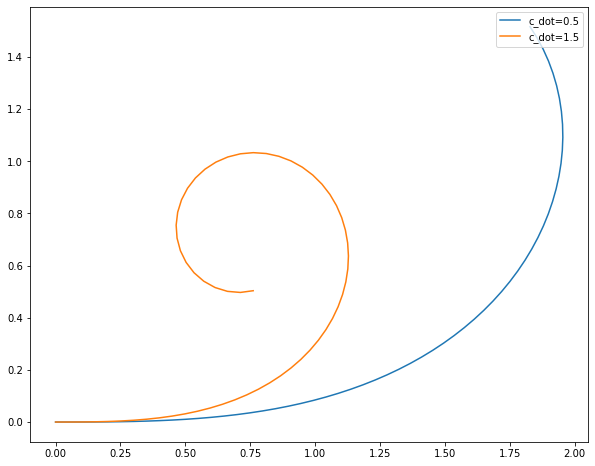

In [6]:
s_vals = np.arange(0.0, 3.0, 0.05)
a_1 = np.sqrt(np.pi/np.abs(0.5))
S_1, C_1 = sc.fresnel([s/a_1 for s in s_vals])
plt.plot([a_1*x for x in C_1], [a_1*y for y in S_1], label="c_dot=0.5")

a_2 = np.sqrt(np.pi/np.abs(1.5))
S_2, C_2 = sc.fresnel([s/a_2 for s in s_vals])
plt.plot([a_2*x for x in C_2], [a_2*y for y in S_2], label="c_dot=1.5")

plt.legend(loc="upper right")

A way to specify a clothoid curve is by giving a start ($c_{start}$) and end curvature ($c_{end}$), as well as the length. We can get the curvature derivative by $\dot c = \frac{c_{end}-c_{start}}{l}$. We get the starting arclength $s_{start}$ that corresponds to $c_{start}$ via $s_{start} = \frac{c_{start}}{\dot c}$. To have $s_{start}$ be at $(0,0)$ and have an initial slope of 0 we apply a translation and rotation on the original clothoid. The original clothoid is translated by $(-x_{start}, -y_{start})$ and then rotated by $\alpha_{start}$. This corresponds to applying a 2D affine translation, then transformation Matrix.

\begin{equation*}
\begin{pmatrix}
x' \\\
y' \\\
1
\end{pmatrix}
=
\begin{pmatrix}
cos(\alpha_{0}) & -sin(\alpha_{0}) & 0 \\\
sin(\alpha_{0}) & cos(\alpha_{0}) & 0 \\\
0 & 0 & 1
\end{pmatrix}
*
\begin{pmatrix}
1 & 0 & -x_{start} \\\
0 & 1 & -y_{start} \\\
0 & 0 & 1
\end{pmatrix}
*
\begin{pmatrix}
x \\\
y \\\
1
\end{pmatrix}
\end{equation*}

\begin{equation*}
x'(s) = (\cos(-\alpha_0) * (x(s)-x(s_{start})) - (\sin(-\alpha_0) * (y(s)-y(s_{start}))
\end{equation*}

\begin{equation*}
y'(s) = (\sin(-\alpha_0) * (x(s)-x(s_{start})) + (\cos(-\alpha_0) * (y(s)-y(s_{start})) 
\end{equation*}

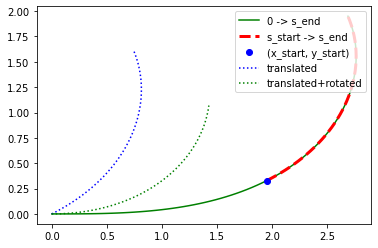

In [10]:
c_start = .5
c_end = 1
length = 2

c_dot = (c_end - c_start)/length
s_start = c_start/c_dot
s_end = c_end/c_dot

a = np.sqrt(np.pi/np.abs(c_dot))
S_1, C_1 = sc.fresnel([s/a for s in np.arange(0.0, s_end, 0.05)])
plt.plot([a*x for x in C_1], [a*y for y in S_1], 'g-', label="0 -> s_end")

s_vals = np.arange(s_start, s_end, 0.05)
S_2, C_2 = sc.fresnel([s/a for s in s_vals])
plt.plot([a*x for x in C_2], [a*y for y in S_2], 'r--', label="s_start -> s_end", linewidth=3)

f_x = lambda s : a * (sc.fresnel([s/a])[1][0])
f_y = lambda s : a * (sc.fresnel([s/a])[0][0])
plt.plot([f_x(s_start)], [f_y(s_start)], 'bo', label="(x_start, y_start)")

f_x_t = lambda s, a0 : np.cos(-a0)*(f_x(s)-f_x(s_start)) - (np.sin(-a0) * (f_y(s)-f_y(s_start)))
f_y_t = lambda s, a0 : np.sin(-a0)*(f_x(s)-f_x(s_start)) + (np.cos(-a0) * (f_y(s)-f_y(s_start)))
plt.plot([f_x_t(s, 0.0) for s in s_vals], [f_y_t(s, 0.0) for s in s_vals], 'b:', label="translated")
alpha_0 = 0.5*s_start*s_start*c_dot
plt.plot([f_x_t(s, alpha_0) for s in s_vals], [f_y_t(s, alpha_0) for s in s_vals], 'g:', label="translated+rotated")

plt.legend(loc="upper right")